### **1. Cài đặt thư viện**


In [12]:
from IPython.core.interactiveshell import InteractiveShell
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from functools import reduce
from abc import ABCMeta, abstractmethod

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"

# %load_ext autotime

In [13]:
dict_raw_data_first_col = {
    "dang_quang": pd.read_csv("../main/raw_data/dang_quang.csv"),
    "duy_anh": pd.read_csv("../main/raw_data/duy_anh.csv"),
    "the_gioi_dong_ho": pd.read_csv("../main/raw_data/the_gioi_dong_ho.csv"),
    "x_watch": pd.read_csv("../main/raw_data/x_watch.csv"),
    "hai_trieu": pd.read_csv("../main/raw_data/hai_trieu.csv"),
}

dict_raw_data = {}

for key, item in dict_raw_data_first_col.items():
    dict_raw_data[key] = item.drop(item.columns[0], axis=1)

### **2. Xem các thông số của từng trang**


In [14]:
for key, item in dict_raw_data.items():
    # xem hình dạng
    print(f"\033[94mWebsite: {key} - Shape: {item.shape}\n")
    item.head()
    print()


Website: dang_quang - Shape: (3098, 13)



,Mã sản phẩm,Thương hiệu,Giá tiền,Đường kính mặt,Chống nước,Chất liệu mặt,Năng lượng sử dụng,Size dây,Chất liệu dây,Chất liệu vỏ,Kiểu dáng,Xuất xứ,Chế độ bảo hành
0,PA5018H,Philippe Auguste,4.581.000đ,42 mm,5 ATM,Tráng Sapphire,Quartz/Pin,21 mm,Dây da chính hãng,Thép không gỉ,Đồng hồ Nam,China,Bảo hành quốc tế 02 năm
1,PA5018G,Philippe Auguste,4.581.000đ,42 mm,5 ATM,Tráng Sapphire,Quartz/Pin,21 mm,Dây da chính hãng,Thép không gỉ,Đồng hồ Nam,China,Bảo hành quốc tế 02 năm
2,PA2022,Philippe Auguste,10.710.000đ,40 mm,5 ATM,Tráng Sapphire,Quartz/Pin,20 mm,Dây da chính hãng,Thép không gỉ,Đồng hồ Nam,China,Bảo hành quốc tế 02 năm
3,PA5021B,Philippe Auguste,5.379.300đ,42 mm,10 ATM,Tráng Sapphire,Quartz/Pin,21 mm,Dây da chính hãng,Thép không gỉ,Đồng hồ Nam,China,Bảo hành quốc tế 02 năm
4,PA5021H,Philippe Auguste,5.990.400đ,42 mm,10 ATM,Tráng Sapphire,Quartz/Pin,21 mm,Dây da chính hãng,Thép không gỉ,Đồng hồ Nam,China,Bảo hành quốc tế 02 năm



Website: duy_anh - Shape: (2963, 18)



,Thương hiệu,Giá tiền,Mã sản phẩm,giới tính,kiểu dáng,loại máy,phong cách,mặt kính,đường kính,chất liệu vỏ,độ dày,chất liệu dây,độ chịu nước,tính năng khác,bảo hành chính hãng,màu mặt,xuất xứ thương hiệu,bảo hành duy anh
0,CITIZEN,12.937.000,CB0011-51L,Nam,Mặt tròn,Eco-Drive (Năng lượng ánh sáng),Thể thao,Sapphire,44mm x 44mm,Thép không gỉ 316L,10.3mm,Thép không gỉ 316L,100m,Lịch thế kỷ.,1 năm quốc tế,Xanh lam,Nhật Bản,NaN
1,CALVIN KLEIN,7.758.000,K3Y2M11F,Nữ,Mặt vuông,Quartz (Máy pin - điện tử),Thời trang,Mặt kính cứng,19.5mm x 36.5mm,Thép không gỉ 316L,8mm,Thép không gỉ 316L dạng lắc,30m,NaN,2 năm quốc tế,Xanh lam,Thụy Sỹ,5 năm (đã bao gồm Bảo hành Quốc tế). Thay pin ...
2,CALVIN KLEIN,3.670.000,K3041107,Nam,Mặt vuông,Quartz (Máy pin - điện tử),Thời trang,Mặt kính cứng,31.5mm x 35.8mm,Thép không gỉ 316L,10mm,Dây da,100 m,Đặt hàng online giảm giá 10%,2 năm quốc tế,Đen,Thụy Sỹ,5 năm (đã bao gồm Bảo hành Quốc tế). Thay pin ...
3,HAMILTON,12.903.000,H64611135,Nam,Mặt tròn,Quartz (Máy pin - điện tử),Thể thao,Sapphire,42mm,Thép không gỉ 316L,11.9mm,Thép không gỉ 316L,200m,"Lịch thứ, lịch ngày.",2 năm quốc tế,Đen,Thụy Sỹ,5 năm (đã bao gồm Bảo hành Quốc tế). Thay pin ...
4,HAMILTON,11.968.000,H69439363,Nam,Mặt tròn,Đồng hồ cơ lên giây cót bằng tay ( Manual wind...,Quân đội,Sapphire,38mm,Thép không gỉ 316L,NaN,Dây dù,50m,"Lịch ngày. Caliber H-50, trữ cót 80h.",2 năm quốc tế,Xanh Lá,Thụy Sỹ,5 năm (đã bao gồm Bảo hành Quốc tế)



Website: the_gioi_dong_ho - Shape: (1840, 18)



,Tên sản phẩm,Giá tiền,Mã sản phẩm,Thương Hiệu,Quốc gia đăng ký thương hiệu,Giới tính,Loại sản phẩm,Đường kính mặt,Chiều dày,Chất liệu vỏ,Chất liệu dây,Chất liệu mặt kính,Độ chịu nước,Nơi sản xuất,Bảo hành,Kiểu máy,Dành cho,Mã sản phâm
0,LOBINNI,"5,150,000 VNĐ",L9222-1,LOBINNI,Thụy Sỹ,Nam,Đồng hồ cơ (Automatic),42 mm,11.5 mm,Thép không gỉ 316L,Dây da cao cấp,Sapphire,5 ATM,Trung Quốc,24 tháng,NaN,NaN,NaN
1,LOBINNI,"5,480,000 VNĐ",L17511-1,LOBINNI,Thụy Sỹ,Nam,Đồng hồ Automatic,42 mm,10 mm,Thép không gỉ 316L,Thép không gỉ 316L,Sapphire,5 ATM,Trung Quốc,24 tháng,NaN,NaN,NaN
2,LOBINNI,"4,550,000 VNĐ",L12032-1,LOBINNI,Thụy Sỹ,Nam,Đồng hồ Automatic,39 mm,11 mm,Thép không gỉ 316L,Dây da cao cấp,Sapphire,5 ATM,Trung Quốc,24 tháng,NaN,NaN,NaN
3,LOBINNI,"5,280,000 VNĐ",L9010-1,LOBINNI,Thụy Sỹ,Nam,Đồng hồ Automatic,42 mm,11 mm,Thép không gỉ 316L,Dây da cao cấp,Sapphire,5 ATM,Trung Quốc,24 tháng,NaN,NaN,NaN
4,LOBINNI,"4,800,000 VNĐ",L16050-2,LOBINNI,Thụy Sỹ,Nam,Đồng hồ Automatic,41 mm,11 mm,Thép không gỉ 316L,Dây da cao cấp,Sapphire,5 ATM,Trung Quốc,24 tháng,NaN,NaN,NaN



Website: x_watch - Shape: (3723, 14)



,Giá tiền,Mã sản phẩm,Nhãn hiệu,Nguồn gốc,Kiểu máy,Kích cỡ,Chất liệu vỏ,Chất liệu dây,Chất liệu kính,Độ chịu nước,Chức năng khác,Bảo hiểm,Bảo hành quốc tế,Giới tính
0,14.940.000,SRPD07J1,Seiko,Nhật Bản,Automatic,37 mm,Thép không gỉ 316L,Dây da,Kính Sapphire,30 m,Lịch ngày,5 năm cả lỗi người dùng tại Xwatch,1 năm,Nam
1,5.670.000,BM6960-56E,Citizen,Nhật Bản,Eco-Drive,42 mm,Thép không gỉ 316L,Thép không gỉ 316L,Kính cứng,50m,Lịch ngày,5 năm cả lỗi người dùng tại Xwatch,1 năm,Nam
2,2.080.000,F.7.1052.01,Freelook,Pháp,Quartz (Pin),NaN,Thép không gỉ 316L,Thép không gỉ,Kính Cứng,30m,NaN,5 năm cả lỗi người dùng tại Xwatch,2 năm,Nữ
3,3.230.000,OP89322GSK-V,Olym Pianus,Nhật Bản,Quartz (Pin),40 mm,Thép không gỉ 316L/ Mạ vàng PVD,Thép không gỉ 316L,Kính Sapphire,30 m,Lịch ngày,5 năm cả lỗi người dùng tại Xwatch,2 năm,Nam
4,3.890.000,BF2024-50L,Citizen,Nhật Bản,Quartz (Pin),41 mm,Thép không gỉ 316L,Thép không gỉ,Kính cứng,50 m,"Lịch ngày, lịch thứ",5 năm cả lỗi người dùng tại Xwatch,1 năm,Nam



Website: hai_trieu - Shape: (2488, 18)



,Tên sản phẩm,Giá tiền,thương hiệu,số hiệu sản phẩm,xuất xứ,giới tính,kính,máy,bảo hành quốc tế,bảo hành tại hải triều,đường kính mặt số,bề dày mặt số,niềng,dây đeo,màu mặt số,chống nước,chức năng,nơi sản xuất
0,Tissot,12.250.000,Tissot,T063.209.11.038.00,Thụy Sỹ,Nữ,Sapphire (Kính Chống Trầy),Quartz (Pin),2 Năm,4 Năm – RED Guarantee,31 mm,5.2 mm,Thép Không Gỉ,Thép Không Gỉ,Trắng,3 ATM,NaN,Thụy Sỹ
1,Bulova,8.500.000,Bulova,96P198,Thụy Sỹ / Mỹ,Nữ,Sapphire (Kính Chống Trầy),Quartz (Pin),3 Năm,4 Năm – RED Guarantee,32 mm,8 mm,Thép Không Gỉ,Thép Không Gỉ,Xanh Đen,3 ATM,NaN,Thụy Sỹ
2,Casio,1.633.000,Casio,A100WE-7BDF,Nhật Bản,Nam,Resin Glass (Kính Nhựa),Quartz (Pin),1 Năm,NaN,40.7 mm x 32.7 mm,9.2 mm,NaN,NaN,Đen,3 ATM,Lịch – Bộ Bấm Giờ – Giờ Kép – Vài Chức Năng Khác,Trung Quốc
3,Casio,3.529.000,Casio,EFV-540D-1AVUDF,Nhật Bản,Nam,Mineral Crystal (Kính Cứng),Quartz (Pin),1 Năm,NaN,43.8 mm,12.1 mm,NaN,NaN,Đen,10 ATM,Lịch Ngày – Chronograph,Trung Quốc
4,Casio,803.000,Casio,W-218HC-4A2VDF,Nhật Bản,Nữ,Resin Glass (Kính Nhựa),Quartz (Pin),1 Năm,NaN,44.4 mm x 43.2 mm,11 mm,Nhựa,Dây Cao Su,Trắng,5 ATM,Lịch – Bộ Bấm Giờ – Giờ Kép – Đèn Led – Vài Ch...,Trung Quốc


### **3. Xử lý cùng chung định dạng cột cho các trang**


In [15]:
for key, item in dict_raw_data.items():
    item.dropna(thresh=3, inplace=True)

dict_raw_data["the_gioi_dong_ho"].drop(columns=["Kiểu máy"], inplace=True)

dict_raw_data["duy_anh"]["Thương hiệu"] = dict_raw_data["duy_anh"]["Thương hiệu"].apply(
    lambda x: str(x).title()
)

dict_raw_data["the_gioi_dong_ho"]["Thương Hiệu"] = dict_raw_data["the_gioi_dong_ho"][
    "Thương Hiệu"
].apply(lambda x: str(x).title())

In [16]:
df_watch = pd.concat([df for df in dict_raw_data.values()])


In [17]:
print(df_watch)

     Mã sản phẩm       Thương hiệu     Giá tiền Đường kính mặt Chống nước   Chất liệu mặt Năng lượng sử dụng Size dây      Chất liệu dây   Chất liệu vỏ    Kiểu dáng Xuất xứ          Chế độ bảo hành giới tính kiểu dáng loại máy phong cách mặt kính đường kính chất liệu vỏ độ dày chất liệu dây độ chịu nước tính năng khác bảo hành chính hãng màu mặt xuất xứ thương hiệu bảo hành duy anh Tên sản phẩm Thương Hiệu Quốc gia đăng ký thương hiệu Giới tính Loại sản phẩm Chiều dày Chất liệu mặt kính Độ chịu nước Nơi sản xuất Bảo hành Dành cho Mã sản phâm Nhãn hiệu Nguồn gốc Kiểu máy Kích cỡ Chất liệu kính Chức năng khác Bảo hiểm Bảo hành quốc tế          thương hiệu số hiệu sản phẩm    xuất xứ                         kính                               máy bảo hành quốc tế bảo hành tại hải triều đường kính mặt số bề dày mặt số          niềng        dây đeo màu mặt số chống nước  chức năng nơi sản xuất
0        PA5018H  Philippe Auguste   4.581.000đ          42 mm      5 ATM  Tráng Sapphire         Q

In [18]:
class PreprocessingWatch:
    @abstractmethod
    def checkSubInString(lst, x):
        return any(s in x for s in lst)

    @abstractmethod
    def processRenameCol(df):
        dict_rename_col = {
            "Giá tiền": "Giá tiền (VNĐ)",
            "Kích cỡ": "Kích cỡ (mm)",
            "Độ chịu nước": "Độ chịu nước (ATM)",
        }

        df = df.rename(columns=dict_rename_col)

        return df

    @abstractmethod
    def dropColNotEssential(lst_col, df):
        df = df.drop(columns=lst_col)

        return df

    @abstractmethod
    def processPriceCol(x):
        x = str(x)
        
        if x =='nan':
            return None
        if "đ" in x:
            x = x[:-1].replace(".", "")
        elif "VNĐ" in x:
            x = x.replace(",", "").split()[0]

        if "." in x:
            x = x.replace(".", "")

        if "-20%" in x:
            x = x.replace("-20%", "")

        return x

    @abstractmethod
    def preprocessNumericValue(df):
        df = df[df["Giá tiền"].isin(["Liên hệ"]) == False]

        df["Giá tiền"] = df["Giá tiền"].apply(PreprocessingWatch.processPriceCol)

        return df

    @abstractmethod
    def processUniqueColBrand(x):
        x = str(x)
        
        if x =='nan':
            return None
        
        if PreprocessingWatch.checkSubInString(("AG", "Aries Gold", "G7016"), x):
            x = "Aries Gold"
        elif "Q&Q" in x:
            x = "Q&Q Citizen"
        elif "Atlantic Swiss" in x:
            x = "Atlantic Swiss"
        elif "casio" in x.lower():
            x = "Casio"
        elif PreprocessingWatch.checkSubInString(("Jacques Lemans", "JL"), x):
            x = "Jacques Lemans"
        elif PreprocessingWatch.checkSubInString(("Philippe Auguste", "PA"), x):
            x = "Philippe Auguste"
        elif "Epos Swiss" in x:
            x = "Epos Swiss"
        elif "Olympia Star" in x:
            x = "Olympia Star"
        elif "Stuhrling" in x:
            x = "Stuhrling"
        elif "citizen" in x.lower():
            x = "Citizen"
        elif "seiko" in x.lower():
            x = "Seiko"
        elif "doxa" in x.lower():
            x = "Doxa"
        elif "orient" in x.lower():
            x = "Orient"
        elif "Frederique Constant" in x:
            x = "Frederique Constant"
        elif "Fossil" in x:
            x = "Fossil"
        elif "SR" in x:
            x = "Stefano Ricci"
        return x

    @abstractmethod
    def changeMaterialRope(x):
        x = str(x)
        
        if x =='nan':
            return None

        if "da" in x.lower():
            x = "Dây da"
        elif PreprocessingWatch.checkSubInString(("cao su", "cao cu"), x.lower()):
            x = "Dây cao su"
        elif "vải" in x.lower():
            x = "Dây vải"
        elif "ceramic" in x.lower():
            x = "Gốm ceramic"
        elif "dù" in x.lower():
            x = "Dây dù"
        elif PreprocessingWatch.checkSubInString(("Hợp kim", "Titanium"), x):
            x = "Hợp kim Titanium"
        elif "Silicon" in x:
            x = "Dây silicon"
        elif "Vàng" in x:
            x = "Dây vàng"
        elif "kim loại" in x.lower():
            x = "Dây kim loại"
        elif "nhựa" in x.lower():
            x = "Dây nhựa"
        elif "Satin" in x:
            x = "Dây satin"
        elif PreprocessingWatch.checkSubInString(("Sapphire", "Đá"), x):
            x = "Dây đá"
        elif "Nato" in x:
            x = "Dây nato"
        elif PreprocessingWatch.checkSubInString(
            ("gỉ", "Stainless Steel", "rỉ", "Thép"), x
        ):
            x = "Thép không gỉ"

        return x

    @abstractmethod
    def changeOriginalWatch(x):
        x = str(x)
        
        if x =='nan':
            return None
        
        if PreprocessingWatch.checkSubInString(
            ("China", "hong kong", "HongKong", "Hong Kong", "Hồng Kông"), x
        ):
            x = "Trung Quốc"
        elif PreprocessingWatch.checkSubInString(("Thuỵ Sỹ", "Thuỵ Sĩ", "Thụy Sỹ"), x):
            x = "Thụy Sĩ"
        elif "Mỹ" in x or "Hoa Kỳ" in x:
            x = "Mỹ"
        elif "Thuỵ Điển" in x:
            x = "Thụy Điển"
        elif "Nhật bản" in x:
            x = "Nhật Bản"
        return x

    @abstractmethod
    def changeGenderWatch(x):
        x = str(x)
        
        if x =='nan':
            return None

        if "nam" in x.lower():
            x = "Nam"
        elif "nữ" in x.lower():
            x = "Nữ"

        return x

    @abstractmethod
    def changeMaterialGlasses(x):
        x = str(x)
        
        if x =='nan':
            return None

        if "sap" in x.lower() or "hire" in x.lower():
            x = "Kính sapphire"
        elif "har" in x.lower():
            x = "Kính hardlex"
        elif "hesalite" in x.lower():
            x = "Kính hesalite"
        elif PreprocessingWatch.checkSubInString(
            ("cứng", "khoáng", "mineral", "crystal "), x.lower()
        ):
            x = "Kính cứng"
        elif "nhựa" in x.lower():
            x = "Kính nhựa"
        elif "lực" in x.lower():
            x = "Kính cường lực"
        elif "Kính Kính" in x or "lồi" in x.lower():
            x = "Kính thường"
        elif "Mica" in x:
            x = "Kính mica"

        return x

    @abstractmethod
    def changeTypeWatch(x):
        x = str(x)
        if x =='nan':
            return None

        if "tay" in x or "hand" in x.lower():
            x = "Hand Winding"
        elif PreprocessingWatch.checkSubInString(
            ("quartz", "quatz", "quarzt"), x.lower()
        ):
            x = "Quartz"
        elif PreprocessingWatch.checkSubInString(("Automatic", "Aotomatic", "cơ"), x):
            x = "Automatic"
        elif "Eco" in x:
            x = "Eco-Drive"
        elif "Solar" in x:
            x = "Solar"
        elif "Japan movement" in x:
            x = "Japan movement"
        elif "pin" in x.lower():
            x = "Pin"
        elif "kine" in x.lower():
            x = "Kinentic"

        return x

    @abstractmethod
    def changeShellMaterial(x):
        x = str(x)
        
        if x =='nan':
            return None

        if PreprocessingWatch.checkSubInString(
            ("gỉ", "Stainless Steel", "rỉ", "Thép"), x
        ):
            x = "Thép không gỉ"
        elif PreprocessingWatch.checkSubInString(("Hợp kim", "Hợp", "Titanium"), x):
            x = "Hợp kim Titanium"
        elif "vàng" in x.lower():
            x = "Vàng"
        elif "nhựa" in x.lower():
            x = "Nhựa"
        elif "ceramic" in x.lower():
            x = "Gốm ceramic"
        elif "Bạc" in x:
            x = "Bạc"
        elif "đồng" in x.lower():
            x = "Đồng"
        elif "carbon" in x.lower():
            x = "Carbon"
        elif "thủy tinh" in x.lower():
            x = "Thủy tinh"

        return x

    @abstractmethod
    def changeWaterResistance(x):
        x = str(x)
        
        if x =='nan':
            return None

        lower_x = x.lower()

        if "100" in x:
            x = "10"
        elif "atm" in lower_x:
            x = lower_x.split("atm")[0].strip()
        elif "bar" in lower_x:
            x = lower_x.split("bar")[0].strip()
        elif "m" in lower_x:
            value = int(float(lower_x.split("m")[0].strip()))
            x = str(value / 10)

        if x == "nam 10" or x == "nam( 5" or x == "nam 5":
            x = x.split(" ")[-1]

        if ".0" in x:
            x = x.split(".")[0]

        if x == "0.8":
            x = "3"

        if x == "Đường":
            x = "20"

        if x == "×":
            x = x.split("×")[0]

        return x

    @abstractmethod
    def changeSizeWatch(x):
        x = str(x).strip()
        
        if x == 'nan':
            return None

        if "*" in x:
            x = x.split("*")[0]

        elif "X" in x:
            x = x.split("X")[0]

        elif "x" in x:
            x = x.split("x")[0]

        if "m" in x:
            if "mm" in x:
                if " " in x:
                    x = x.replace("mm", "").split()[0]
                else:
                    x = x.replace("mm", "")
            x = x.replace("m", "")

        if "\xa0" in x:
            x = x.replace("\xa0", "")

        if "Nam" in x:
            x = x.replace("Nam", "")

        if "\u2002×" in x:
            x = x.split("\u2002×")[0]

        if "," in x:
            if "." not in x:
                x = x.replace(",", ".")
            else:
                x = x.split('.')[0]

        if "-" in x:
            x = x.split("-")[0]

        return x

    @abstractmethod
    def processWarrantyWatch(x):
        x = str(x).lower().strip()
        
        if x == 'nan':
            return None

        if "bảo hành quốc tế" in x:
            x = int(x.split()[-2])
        elif "năm quốc tế" in x:
            try:
                x = int(x.split()[0])
            except:
                x = x.replace("năm quốc tế", "")
        elif "năm chính hãng" in x:
            x = x.replace("năm chính hãng", "")

        elif "năm tiêu chuẩn" in x:
            x = x.split()[0]

        elif "năm" in x:
            x = x.split()[0]

        elif "tháng" in x:
            x = int(int(x.split()[0]) / 12)

        elif "trọn đời" in x:
            x = "100"

        return x

    @abstractmethod
    def preprocessCategoryValue(df):
        df["Thương hiệu"] = df["Thương hiệu"].apply(
            PreprocessingWatch.processUniqueColBrand
        )

        df = df[df["Thương hiệu"].isin(["nan", "Đồng hồ nữ", "Nan"]) == False]

        df["Chất liệu dây"] = df["Chất liệu dây"].apply(
            PreprocessingWatch.changeMaterialRope
        )

        df["Xuất xứ"] = df["Xuất xứ"].apply(PreprocessingWatch.changeOriginalWatch)

        df = df[
            df["Giới tính"].isin(
                [
                    "Đồng hồ trẻ em",
                    "Unisex",
                    "Đồng hồ đôi",
                    "đồng hồ đôi",
                    "Đồng hồ unisex",
                    "unisex",
                ]
            )
            == False
        ]

        df["Giới tính"] = df["Giới tính"].apply(PreprocessingWatch.changeGenderWatch)

        df["Chất liệu mặt kính"] = df["Chất liệu mặt kính"].apply(
            PreprocessingWatch.changeMaterialGlasses
        )

        df = df[
            df["Kiểu máy"].isin(
                ["Trang sức", "Đồng hồ Tourbillon", "Swiss", "Đồng hồ điện tử"]
            )
            == False
        ]

        df["Kiểu máy"] = df["Kiểu máy"].apply(PreprocessingWatch.changeTypeWatch)

        df["Chất liệu vỏ"] = df["Chất liệu vỏ"].apply(
            PreprocessingWatch.changeShellMaterial
        )

        df = df[df["Độ chịu nước"].isin(["Water Resistant"]) == False]

        df["Độ chịu nước"] = df["Độ chịu nước"].apply(
            PreprocessingWatch.changeWaterResistance
        )

        df["Kích cỡ"] = df["Kích cỡ"].apply(PreprocessingWatch.changeSizeWatch)
        
        df = df[df["Kích cỡ"].isin(["Đường", "Na"]) == False]
        
        df["Bảo hành"] = df["Bảo hành"].apply(PreprocessingWatch.processWarrantyWatch)

        df["Bảo hành"] = df["Bảo hành"].apply(lambda x: str(x).strip())
        
        df = df[df["Bảo hành"].isin(['thương hiệu thụy điển, máy nhật bản']) == False]

        return df

    @abstractmethod
    def combineColumnDuplicate(first_col, lst_col, df):
        for col in lst_col:
            df[first_col] = df[first_col].combine_first(df[col])
            df = df.drop(columns=[col])

        return df

    @abstractmethod
    def combineColumnAll(df):
        df = PreprocessingWatch.combineColumnDuplicate(
            "Giới tính", ["Dành cho", "giới tính", "Kiểu dáng", "kiểu dáng"], df
        )

        df = PreprocessingWatch.combineColumnDuplicate(
            "Bảo hành",
            [
                "Bảo hành quốc tế",
                "bảo hành chính hãng",
                "Chế độ bảo hành",
                "bảo hành quốc tế",
            ],
            df,
        )

        df = PreprocessingWatch.combineColumnDuplicate(
            "Chất liệu dây", ["chất liệu dây", "dây đeo"], df
        )

        df = PreprocessingWatch.combineColumnDuplicate(
            "Chất liệu mặt kính",
            ["kính", "mặt kính", "Chất liệu mặt", "Chất liệu kính"],
            df,
        )

        df = PreprocessingWatch.combineColumnDuplicate(
            "Xuất xứ",
            [
                "Nguồn gốc",
                "xuất xứ thương hiệu",
                "Quốc gia đăng ký thương hiệu",
                "xuất xứ",
            ],
            df,
        )

        df = PreprocessingWatch.combineColumnDuplicate(
            "Độ chịu nước", ["Chống nước", "độ chịu nước", "chống nước"], df
        )

        df = PreprocessingWatch.combineColumnDuplicate(
            "Kiểu máy", ["loại máy", "máy", "Năng lượng sử dụng", "Loại sản phẩm"], df
        )

        df = PreprocessingWatch.combineColumnDuplicate(
            "Mã sản phẩm", ["Mã sản phâm", "số hiệu sản phẩm"], df
        )

        df = PreprocessingWatch.combineColumnDuplicate(
            "Thương hiệu", ["Thương Hiệu", "Nhãn hiệu", "thương hiệu"], df
        )

        df = PreprocessingWatch.combineColumnDuplicate(
            "Kích cỡ", ["Đường kính mặt", "đường kính", "đường kính mặt số"], df
        )

        df = PreprocessingWatch.combineColumnDuplicate(
            "Chất liệu vỏ", ["niềng", "chất liệu vỏ"], df
        )

        df = PreprocessingWatch.dropColNotEssential(
            [
                "bảo hành tại hải triều",
                "bảo hành duy anh",
                "Bảo hiểm",
                "Nơi sản xuất",
                "nơi sản xuất",
                "Tên sản phẩm",
                "Size dây",
                "Chiều dày",
                "độ dày",
                "bề dày mặt số",
                "màu mặt số",
                "màu mặt",
                "Chức năng khác",
                "chức năng",
                "tính năng khác",
                "phong cách",
            ],
            df,
        )

        return df

In [19]:
df_watch.shape


(14109, 63)

In [20]:
df_watch = PreprocessingWatch.combineColumnAll(df_watch)

df_watch = PreprocessingWatch.preprocessNumericValue(df_watch)

df_watch = PreprocessingWatch.preprocessCategoryValue(df_watch)

df_watch = PreprocessingWatch.processRenameCol(df_watch)

df_watch.to_csv(r"../main/clean_data/clean_data.csv")


In [21]:
import numpy as np

max_size = np.nanmax(df_watch['Kích cỡ (mm)'].unique())
print(max_size)


TypeError: '>=' not supported between instances of 'str' and 'NoneType'

In [ ]:
def segment_size(size):
    if pd.isnull(size):
        return 'Unknown'
    elif size == '40':
        return '1-40'
    else:
        try:
            size = int(size)
            if size < 40:
                return '1-40'
            elif size >= 40 and size <= 50:
                return '40-50'
            elif size > 50 and size <= 60:
                return '50-60'
            else:
                return '>60'
        except ValueError:
            return 'Unknown'

In [ ]:

df_watch['Kích cỡ (mm)']=df_watch['Kích cỡ (mm)'].apply(segment_size)

<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

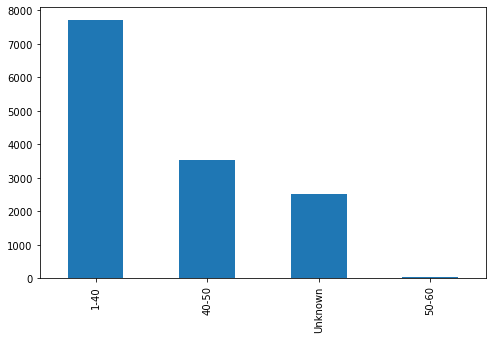

In [ ]:
plt.figure(figsize=(8,5))
df_watch['Kích cỡ (mm)'].value_counts().plot(kind='bar')

In [ ]:
df_watch.isnull().sum()

Mã sản phẩm            25
Thương hiệu           327
Giá tiền (VNĐ)          0
Chất liệu dây         393
Chất liệu vỏ          503
Xuất xứ               255
Giới tính              70
Chất liệu mặt kính     48
Độ chịu nước (ATM)    165
Bảo hành                0
Kiểu máy               28
Kích cỡ (mm)            0
dtype: int64

*Phân loại theo Thương Hiệu sản phẩm

In [ ]:
df_watch['Thương hiệu'].unique()

array(['Philippe Auguste', 'Diamond D', 'Atlantic Swiss', 'Aries Gold',
       'Epos Swiss', 'Jacques Lemans', 'Tourbillon Memorigin',
       'Q&Q Citizen', None, 'Bruno Sohnle', 'Citizen', 'Casio',
       'Stuhrling', 'Olympia Star', 'Calvin Klein', 'Hamilton', 'Seiko',
       'Orient', 'Longines', 'Daniel Wellington', 'Tissot', 'Olym Pianus',
       'Fossil', 'Skagen', 'Freelook', 'Mido', 'Frederique Constant',
       'Titoni', 'Charriol', 'Eterna', 'Claude Bernard', 'Candino',
       'Certina', 'Rotary', 'Michael Kors', 'Maurice Lacroix', 'Lobinni',
       'Carnival', 'Teintop', 'Kassaw', 'Iw Carnival', 'Poniger',
       'Hazeal', 'Lorbern', 'Leonidas', 'Mini Focus', 'Stefano Ricci',
       'Ogival', 'Festina', 'Bulova', 'Bentley', 'OP', 'Doxa', 'Saga',
       'Koi', 'Rado', 'Movado', 'Police', 'Sokolov', 'Adriatica', 'Timex'],
      dtype=object)

In [ ]:
def segment_th(th):
  if pd.isnull(th):
    return 'Unknown'
  elif 'Citizen' in th or 'Q&Q Citizen' in th:
    return 'Citizen'
  elif 'Seiko' in th:
    return 'Seiko'
  elif 'Orient' in th:
    return 'Orient'
  elif 'Lobinni' in th:
    return 'Lobinni'
  elif 'Casio' in th:
    return 'Casio'
  elif 'Tissot' in th:
    return 'Tissot'
  else:
    return 'Other'

In [ ]:
df_watch['Thương hiệu']=df_watch['Thương hiệu'].apply(segment_th)

In [ ]:
print(df_watch['Thương hiệu'].unique())

['Other' 'Citizen' 'Unknown' 'Casio' 'Seiko' 'Orient' 'Tissot' 'Lobinni']


<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

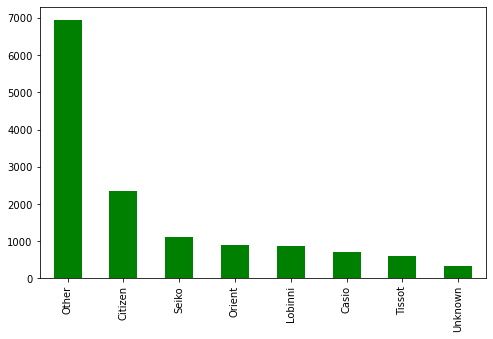

In [ ]:
plt.figure(figsize=(8,5))
df_watch['Thương hiệu'].value_counts().plot(kind='bar',color='green')

Phân loại theo Kiểu máy

In [ ]:
df_watch['Kiểu máy'].unique()

array(['Quartz', 'Automatic', 'Hand Winding', 'Eco-Drive', None, 'Pin',
       'Kinentic', 'Cảm ứng', 'Japan movement', 'Solar'], dtype=object)

In [ ]:
def segment_model(model):
  if pd.isnull(model):
    return 'Unknown'
  elif 'Quartz' in model:
    return 'Quartz'
  elif 'Automatic' in model:
    return 'Automatic'
  elif 'Hand Winding' in model:
    return 'Hand Winding'
  elif 'Eco-Drive' in model:
    return 'Eco'
  elif 'Pin' in model:
    return 'Pin'
  elif 'Kinentic' in model:
    return 'Kinentic'
  elif 'Cảm ứng' in model:
    return 'Cảm ứng'
  elif 'Japan movement' in model:
    return 'Japan movement'
  elif 'Solar' in model:
    return 'Solar'
  else:
    return 'Other'

In [ ]:
df_watch['Kiểu máy']=df_watch['Kiểu máy'].apply(segment_model)

<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

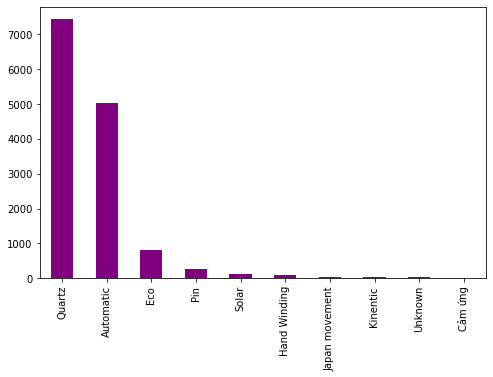

In [ ]:
plt.figure(figsize=(8,5))
df_watch['Kiểu máy'].value_counts().plot(kind='bar',color='purple')

Phân đoạn theo độ chịu nước

In [ ]:
df_watch['Độ chịu nước (ATM)'].unique()

array(['5', '10', '3', '20', '50', None, '30', '6', '12', '60', '38'],
      dtype=object)

In [ ]:
def segment_water_resistance(water_resistance):
    if pd.isnull(water_resistance) or water_resistance == 'Not specified':
        return 'Unknown'
    elif water_resistance == '3':
        return 'Splash resistant'
    else:
        depth = int(water_resistance)
        if depth >= 0 and depth <= 10:
            return '10ATM or less'
        elif depth > 10 and depth <= 30:
            return '10ATM - 30ATM'
        elif depth <= 60:
            return '10ATM or less'
        else:
            return 'More than 60ATM'

In [ ]:
df_watch['Độ chịu nước (ATM)']=df_watch['Độ chịu nước (ATM)'].apply(segment_water_resistance)

<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

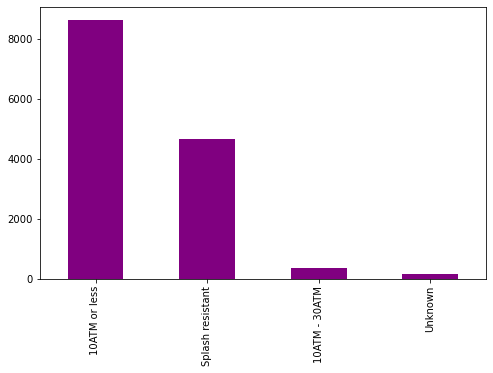

In [ ]:
plt.figure(figsize=(8,5))
df_watch['Độ chịu nước (ATM)'].value_counts().plot(kind='bar',color='purple')

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'Cột')

Text(0, 0.5, 'Số lượng dữ liệu trống')

Text(0, 25, '25')

Text(1, 0, '0')

Text(2, 0, '0')

Text(3, 393, '393')

Text(4, 503, '503')

Text(5, 255, '255')

Text(6, 70, '70')

Text(7, 48, '48')

Text(8, 0, '0')

Text(9, 0, '0')

Text(10, 0, '0')

Text(11, 0, '0')

Text(0.5, 1.0, 'Số lượng dữ liệu trống trong DataFrame')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Mã sản phẩm'),
  Text(1, 0, 'Thương hiệu'),
  Text(2, 0, 'Giá tiền (VNĐ)'),
  Text(3, 0, 'Chất liệu dây'),
  Text(4, 0, 'Chất liệu vỏ'),
  Text(5, 0, 'Xuất xứ'),
  Text(6, 0, 'Giới tính'),
  Text(7, 0, 'Chất liệu mặt kính'),
  Text(8, 0, 'Độ chịu nước (ATM)'),
  Text(9, 0, 'Bảo hành'),
  Text(10, 0, 'Kiểu máy'),
  Text(11, 0, 'Kích cỡ (mm)')])

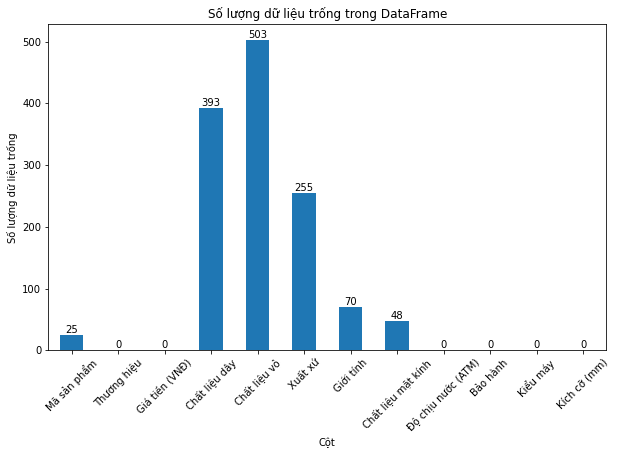

In [ ]:
import matplotlib.pyplot as plt

missing_data_counts = df_watch.isnull().sum()

plt.figure(figsize=(10, 6))
missing_data_counts.plot(kind='bar')
plt.xlabel('Cột')
plt.ylabel('Số lượng dữ liệu trống')

for i, value in enumerate(missing_data_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.title('Số lượng dữ liệu trống trong DataFrame')
plt.xticks(rotation=45)
plt.show()

Phân bố dữ liệu của trường dự đoán Price:

In [ ]:
df_watch.shape

(13829, 12)

In [ ]:
#Check the number of unique value
df_watch.select_dtypes(include='object').nunique()

Mã sản phẩm           12545
Thương hiệu               8
Giá tiền (VNĐ)         3748
Chất liệu dây            16
Chất liệu vỏ              9
Xuất xứ                  14
Giới tính                 2
Chất liệu mặt kính        8
Độ chịu nước (ATM)        4
Bảo hành                  7
Kiểu máy                 10
Kích cỡ (mm)              4
dtype: int64

In [ ]:

list(df_watch.columns)

['Mã sản phẩm',
 'Thương hiệu',
 'Giá tiền (VNĐ)',
 'Chất liệu dây',
 'Chất liệu vỏ',
 'Xuất xứ',
 'Giới tính',
 'Chất liệu mặt kính',
 'Độ chịu nước (ATM)',
 'Bảo hành',
 'Kiểu máy',
 'Kích cỡ (mm)']

In [ ]:
df_watch.select_dtypes(include="float64").columns

Index([], dtype='object')

In [ ]:
cat_vars=[
 'Thương hiệu',
 'Chất liệu vỏ',
 'Chất liệu mặt kính',
 'Độ chịu nước (ATM)',
 'Bảo hành',
 'Kiểu máy',
 'Kích cỡ (mm)']